In [1]:
#import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

data = pd.read_csv('datasets/Absenteeism_at_work.csv', sep=";")

In [2]:
"""
print dimensionality of the data, columns, types and missing values

"""
print(f"Data dimension: {data.shape}")
for col in data.columns:
    print(f"Column: {col:35} | type: {str(data[col].dtype):7} | missing values: {data[col].isna().sum() :3d}")

Data dimension: (740, 21)
Column: ID                                  | type: int64   | missing values:   0
Column: Reason for absence                  | type: int64   | missing values:   0
Column: Month of absence                    | type: int64   | missing values:   0
Column: Day of the week                     | type: int64   | missing values:   0
Column: Seasons                             | type: int64   | missing values:   0
Column: Transportation expense              | type: int64   | missing values:   0
Column: Distance from Residence to Work     | type: int64   | missing values:   0
Column: Service time                        | type: int64   | missing values:   0
Column: Age                                 | type: int64   | missing values:   0
Column: Work load Average/day               | type: float64 | missing values:   0
Column: Hit target                          | type: int64   | missing values:   0
Column: Disciplinary failure                | type: int64   | missing va

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [4]:
#define encoding dictonaries
month_encoding = {1: "January", 2: "Feburary", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December", 0: "Unknown"}

dow_encoding = {2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday", 6: "Friday"}

season_encoding = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

education_encoding = {1: "high school", 2: "graduate", 3: "postgraduate", 4: "master_phd"}

yes_no_encoding = {0: "No", 1: "Yes"}

In [5]:
#apply encoding
preprocessed_data = data.copy()
preprocessed_data['Month of absence'] = preprocessed_data['Month of absence'].apply(lambda x: month_encoding[x])

preprocessed_data['Day of the week'] = preprocessed_data['Day of the week'].apply(lambda x: dow_encoding[x])

preprocessed_data['Seasons'] = preprocessed_data['Seasons'].apply(lambda x: season_encoding[x])

preprocessed_data['Education'] = preprocessed_data['Education'].apply(lambda x: education_encoding[x])

preprocessed_data['Disciplinary failure'] = preprocessed_data['Disciplinary failure'].apply(lambda x: yes_no_encoding[x])

preprocessed_data['Social drinker'] = preprocessed_data['Social drinker'].apply(lambda x: yes_no_encoding[x])

preprocessed_data['Social smoker'] = preprocessed_data['Social smoker'].apply(lambda x: yes_no_encoding[x])

#transform columns
preprocessed_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,No,high school,2,Yes,No,1,90,172,30,4
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,Yes,high school,1,Yes,No,0,98,178,31,0
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,No,high school,0,Yes,No,0,89,170,31,2
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,No,high school,2,Yes,Yes,0,68,168,24,4
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,No,high school,2,Yes,No,1,90,172,30,2


In [6]:
#Identifying Reasons for absence

"""
define function which check if the provided integer value is contained in the icd or not

"""
def in_icd(val):
    return "Yes" if val>=1 and val<=21 else "No"

In [7]:
#add disease column
preprocessed_data['Disease'] = preprocessed_data['Reason for absence'].apply(in_icd)

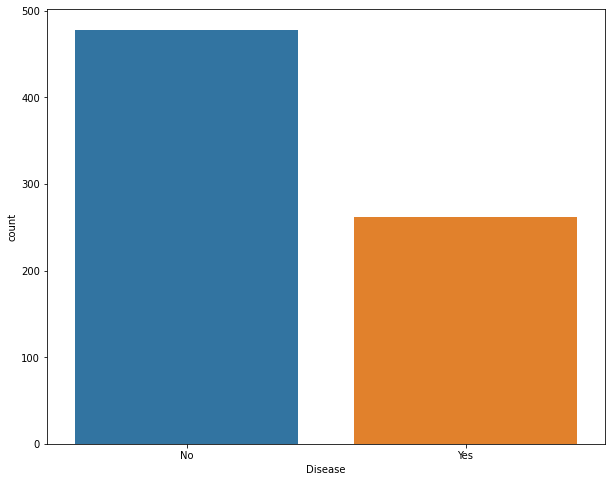

In [8]:
plt.figure(figsize=(10, 8))
sns.countplot(data=preprocessed_data, x="Disease")
plt.savefig("datasets/saved_images/disease_plot.png", format='png', dpi=300)

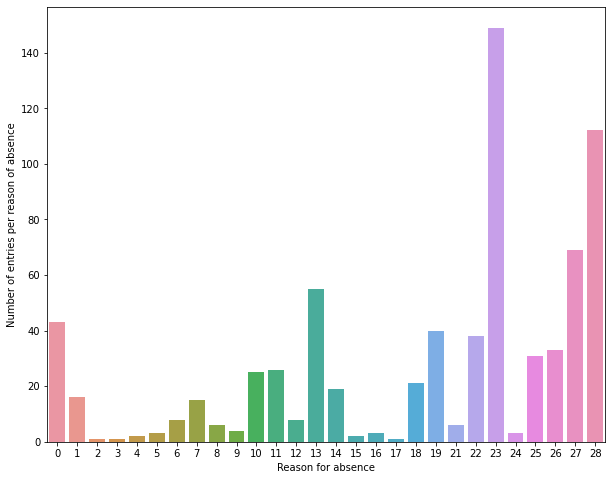

In [9]:
#Initial analysis of the reason for absence
#get the number of entries for each reason for absence
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=preprocessed_data, x="Reason for absence")
ax.set_ylabel("Number of entries per reason of absence")
plt.savefig("datasets/saved_images/absence_reasons_dist.png", format='png')

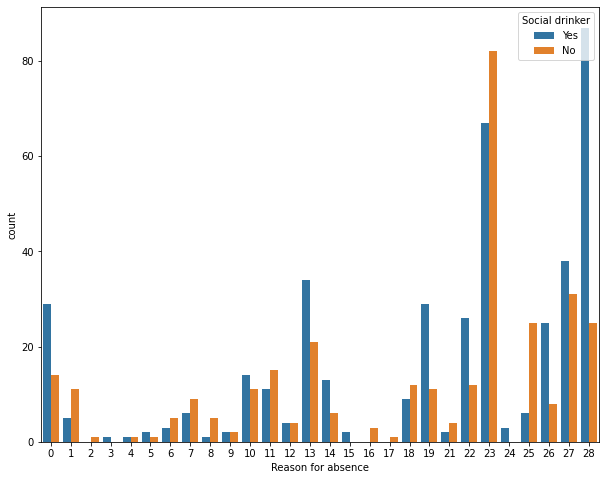

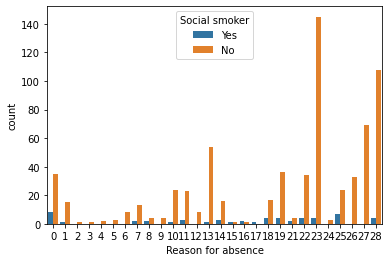

In [10]:
#analysis of social drinkers and smokers
#plot reasons for absence against being a social drinker smoker

plt.figure(figsize=(10, 8))
sns.countplot(data=preprocessed_data, x="Reason for absence", hue="Social drinker", hue_order=["Yes", "No"])

plt.savefig("datasets/saved_images/absence_reasons_drinkers.png", format='png', dpi=300)

plt.figure()
sns.countplot(data=preprocessed_data, x="Reason for absence", hue="Social smoker", hue_order=["Yes", "No"])
plt.savefig("datasets/saved_images/absence_reason_smokers.png", format='png', dpi=300)

In [11]:
#actual count for drinkers and smokers
print(preprocessed_data['Social drinker'].value_counts(normalize=True))
print(preprocessed_data['Social smoker'].value_counts(normalize=True))

Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


In [12]:
#Identifuing reasons of absence with higher probability among drinkers and smokers
#compute probabilitites of being a drinker and somker

drinker_prob = preprocessed_data['Social drinker'].value_counts(normalize=True)["Yes"]
somker_prob = preprocessed_data['Social smoker'].value_counts(normalize=True)["Yes"]
print(f"P(social drinker) = {drinker_prob:.3f} | P(social smoker) = {somker_prob:.3f}")

P(social drinker) = 0.568 | P(social smoker) = 0.073


In [13]:
#create mask for social drinkers smokers
drinker_mask = preprocessed_data['Social drinker'] == "Yes"
smoker_mask = preprocessed_data['Social smoker'] == "Yes"

In [14]:
#compute the total number of entries and the number of absence reasons
total_entries = preprocessed_data.shape[0]
absence_drinker_prob = preprocessed_data["Reason for absence"][drinker_mask].value_counts()/total_entries

absence_smoker_prob = preprocessed_data["Reason for absence"][smoker_mask].value_counts()/total_entries

In [15]:
#compute conditional probabilities
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob["P(absence | social drinker)"] = absence_drinker_prob/drinker_prob
cond_prob["P(absence | social smoker)"] = absence_smoker_prob/somker_prob
cond_prob.head()

,P(absence | social drinker),P(absence | social smoker)
0,0.069048,0.148148
1,0.011905,0.018519
2,NaN,NaN
3,0.002381,NaN
4,0.002381,NaN


<Figure size 432x288 with 0 Axes>

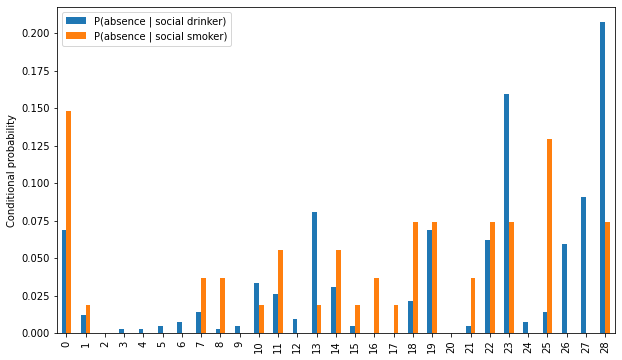

In [16]:
#plot the probabilities
plt.figure()
ax = cond_prob.plot.bar(figsize=(10, 6))
ax.set_ylabel("Conditional probability")
plt.savefig("datasets/saved_images/conditional_probabilities.png", format='png', dpi=300)

In [17]:
#identify the probability of being a drinker smoker, conditioned to absence reason
#compute reason for absence probabolities
absence_prob = preprocessed_data['Reason for absence'].value_counts(normalize=True)

<Figure size 432x288 with 0 Axes>

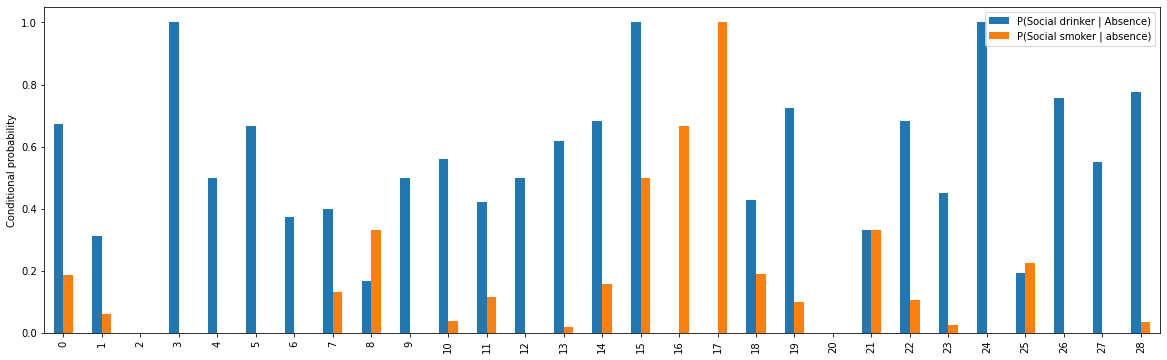

In [18]:
#compute conditional probabilities for drinker and smoker
cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))

cond_prob_drinker_smoker['P(Social drinker | Absence)'] = cond_prob["P(absence | social drinker)"]*drinker_prob/absence_prob

cond_prob_drinker_smoker["P(Social smoker | absence)"] = cond_prob["P(absence | social smoker)"] * somker_prob/absence_prob

plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(20, 6))
ax.set_ylabel("Conditional probability")
plt.savefig("datasets/saved_images/conditional_probabilities_drinker_smoker.png", format='png', dpi=300)

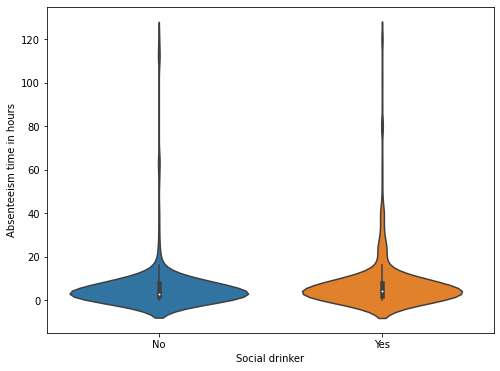

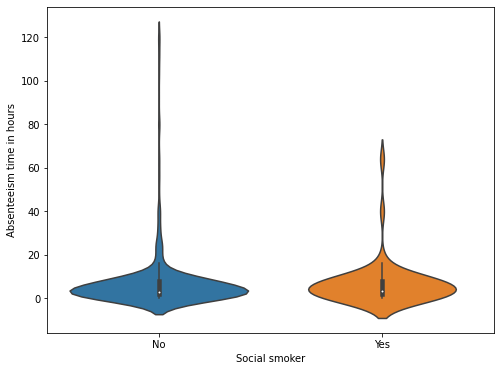

In [19]:
#create violin plots of the absenteeism time in hours
plt.figure(figsize=(8, 6))
sns.violinplot(x="Social drinker", y="Absenteeism time in hours", data=preprocessed_data, order=["No", "Yes"])
plt.savefig("datasets/saved_images/drinkers_hour_dist.png", format='png', dpi=300)
plt.figure(figsize=(8, 6))
sns.violinplot(x="Social smoker", y="Absenteeism time in hours", data=preprocessed_data, order=["No", "Yes"])
plt.savefig("datasets/saved_images/smmokers_hour_dist.png", format='png', dpi=300)

In [20]:
#let hypothesis testing for drinkers
from scipy.stats import ttest_ind
hours_col = "Absenteeism time in hours"

#test mean absenteeism time for drinkers
drinker_mask = preprocessed_data['Social drinker'] == "Yes"
hours_drinkers = preprocessed_data.loc[drinker_mask, hours_col]
hours_non_drinkers = preprocessed_data.loc[~drinker_mask, hours_col]

drinkers_test = ttest_ind(hours_drinkers, hours_non_drinkers)
print(f"Statistic value: {drinkers_test[0]}, | p-value: {drinkers_test[1]}")

Statistic value: 1.7713833295243993, | p-value: 0.07690961828294651


In [21]:
#test absenteeism time for smokers

smokers_mask = preprocessed_data['Social smoker'] == "Yes"
hours_smokers = preprocessed_data.loc[smokers_mask, hours_col]
hours_non_smokers = preprocessed_data.loc[~smokers_mask, hours_col]

smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
print(f"Statistic value: {smokers_test[0]}, p-value: {smokers_test[1]}")

Statistic value: -0.24277795417700243, p-value: 0.8082448720154971


In [22]:
#so from the p-value, we cannot reject null hypothesis
#then  even though the average hours may still be equal, but their distribution may be different

#perform Kolmogorov-Smirnov test to assess the difference in the distribution of two samples

from scipy.stats import ks_2samp

ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)

print(f"Drinkers comparison: Statistics={ks_drinkers[0]:.3f}, p-value={ks_drinkers[1]:.3f}")
print(f"Smokers comparison: Statics:{ks_smokers[0]:.3f}, p-value={ks_smokers[1]:.3f}")

Drinkers comparison: Statistics=0.135, p-value=0.002
Smokers comparison: Statics:0.104, p-value=0.607


In [23]:
#from the results, for driker p-value is too lower than critical value which is strong evidence against the null hypothesis of the two distribution being equal
#for smokers, p-value is higher than critical values, so we cannot reject null hypothesis

In [24]:
#Body Mass Index

"""
define functiom for computing the BMI category, based on BMI values

"""
def get_bmi_category(bmi):
    if bmi < 18.5:
        category = "underweight"
    elif bmi >= 18.5 and bmi < 25:
        category = "healthy weight"
    elif bmi >= 25 and bmi < 30:
        category = "overweight"
    else:
        category = "obese"
    return category

#compute bmi category
preprocessed_data["BMI category"] = preprocessed_data["Body mass index"].apply(lambda x: get_bmi_category(x))

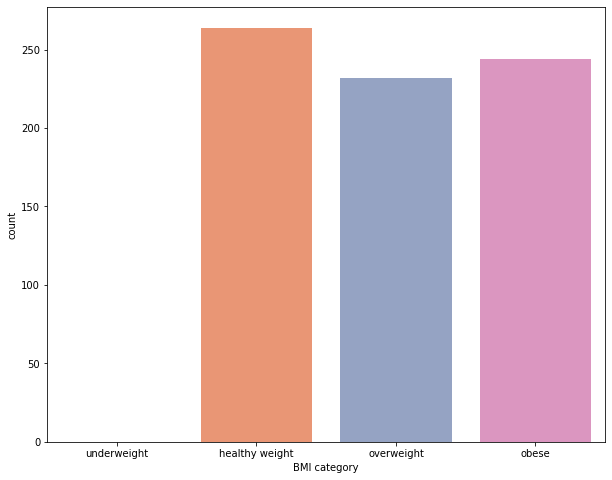

In [25]:
#plot number of entries for each category
plt.figure(figsize=(10, 8))
sns.countplot(data=preprocessed_data, x="BMI category", order=["underweight", "healthy weight", "overweight", "obese"], palette="Set2")
plt.savefig("datasets/saved_images/bmi_category.png", format='png', dpi=300)

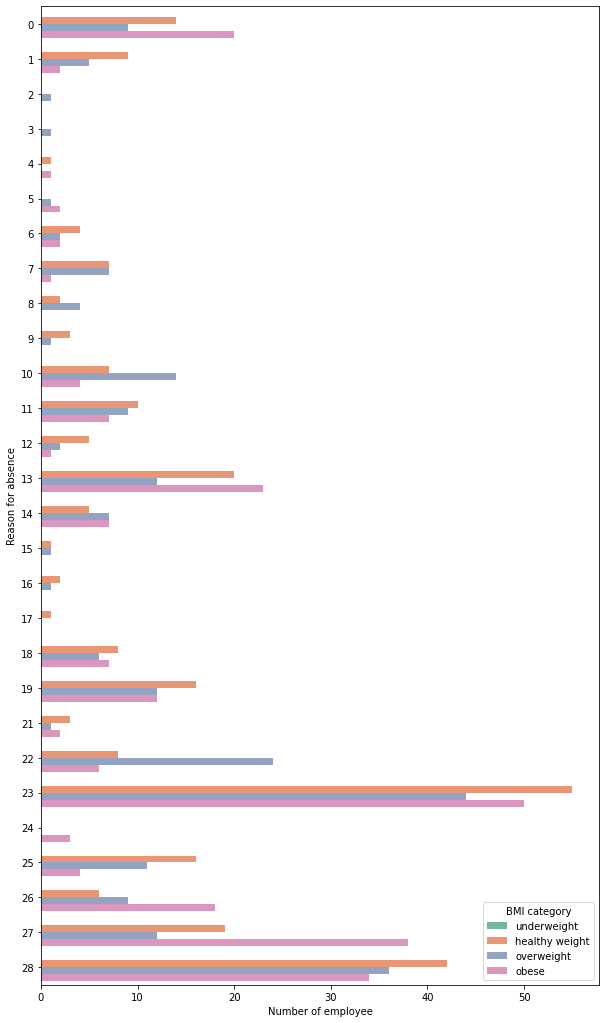

In [26]:
#let see how bmi and absence of reasons
plt.figure(figsize=(10, 18))
ax = sns.countplot(data=preprocessed_data, y="Reason for absence", hue="BMI category", hue_order=["underweight", "healthy weight", "overweight", "obese"], palette="Set2")
ax.set_xlabel("Number of employee")
plt.savefig("datasets/saved_images/reasons_bmi.png", format='png', dpi=300)

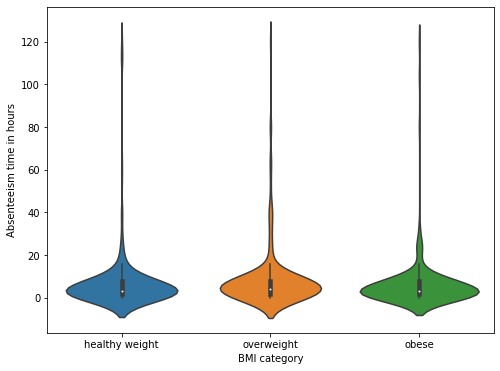

In [27]:
#plot distribution of absent time based on bmi category

plt.figure(figsize=(8, 6))
sns.violinplot(x="BMI category", y="Absenteeism time in hours", data=preprocessed_data, order=["healthy weight", "overweight", "obese"])
plt.savefig("datasets/saved_images/bmi_hour_distribution.png", format='png', dpi=300)

#so from result bmi also not influence on employee's absenteeism

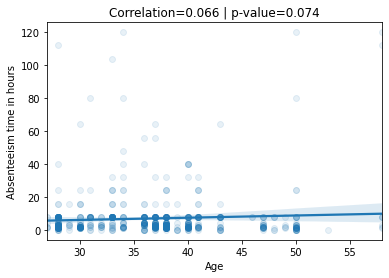

In [28]:
#Age and education factors
#let investigate the correlation between age and absence hours
# We'll also include the Pearson's correlation coefficient and its p-value, where the null hypothesis is that the correlation coefficient between the two features is equal to zero: 

from scipy.stats import pearsonr
pearson_test = pearsonr(preprocessed_data['Age'], preprocessed_data['Absenteeism time in hours'])

"""
Create regression plot and add correlation coefficient in the title
"""
ax = sns.regplot(data=preprocessed_data, x="Age", y="Absenteeism time in hours", scatter_kws={"alpha":0.1})

ax.set_title(f"Correlation={pearson_test[0]:.3f} | p-value={pearson_test[1]:.3f}")
plt.savefig("datasets/saved_images/correlation_age_hours.png", format='png', dpi=300)

As we can observe from the resulting plot, no significant pattern occurs. Furthermore, the correlation coefficient is extremely small (0.066), and its p-value is above the threshold of 0.05, which is an additional indicator that no relationship is present between the Age and Absenteeism time in hours features. 

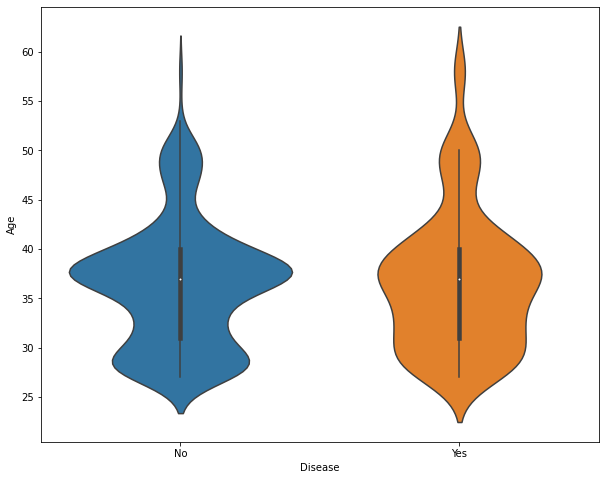

In [29]:
#investigating the impact of age on reason for absence
plt.figure(figsize=(10,8))
sns.violinplot(data=preprocessed_data, x="Disease", y="Age")
plt.savefig("datasets/saved_images/age_disease.png", format='png', dpi=300)

In [30]:
#so there differnce in distribution, now let's hypothesis test on these
"""
get age entries for employee with disease == yes and disease = No
"""
disease_mask = preprocessed_data['Disease'] == "Yes"
disease_ages = preprocessed_data['Age'][disease_mask]
no_disease_ages = preprocessed_data['Age'][~disease_mask]

#perform hypothesis
test_res = ttest_ind(disease_ages, no_disease_ages)
print(f"Test for equality of means: statistic={test_res[0]:.3f}, p-value={test_res[1]:.3f}")

#perform distribution via Kolmogorov Smirnov test
ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f"KS test for equality of distributions: statistic={ks_res[0]:.3f}, p-value={ks_res[1]:.3f}")

Test for equality of means: statistic=0.630, p-value=0.529
KS test for equality of distributions: statistic=0.057, p-value=0.619


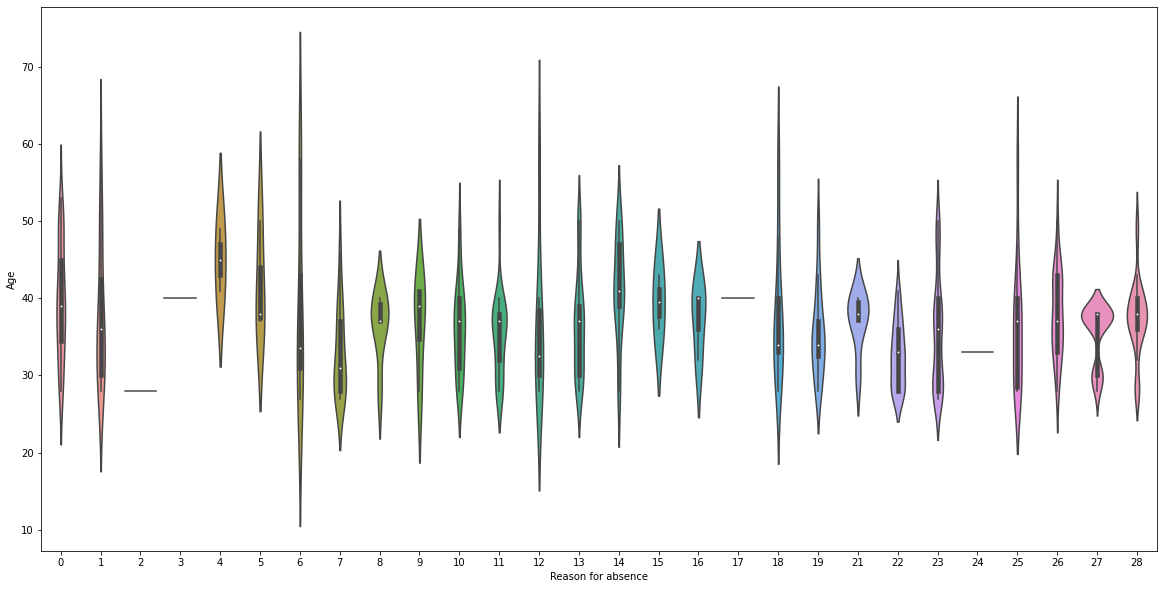

In [31]:
#violin plot reason for absence vs age
plt.figure(figsize=(20, 10))
sns.violinplot(data=preprocessed_data, x="Reason for absence", y="Age")
plt.savefig("datasets/saved_images/age_reason.png", format='png', dpi=300)

#SO finally we can conclude that age has no impact on employees' absenteeism

In [32]:
#Investigating the impact of education on reason for absence
#compute percentage of employee per education level

education_type = ["high school", "graduate", "postgraduate", "master_phd"]
counts = preprocessed_data['Education'].value_counts()
percentages = preprocessed_data['Education'].value_counts(normalize=True)
for edu in education_type:
    print(f"Education type:{edu:12s} | Counts: {counts[edu]:6.0f} | Percentage: {100*percentages[edu]:4.1f}")


Education type:high school  | Counts:    611 | Percentage: 82.6
Education type:graduate     | Counts:     46 | Percentage:  6.2
Education type:postgraduate | Counts:     79 | Percentage: 10.7
Education type:master_phd   | Counts:      4 | Percentage:  0.5


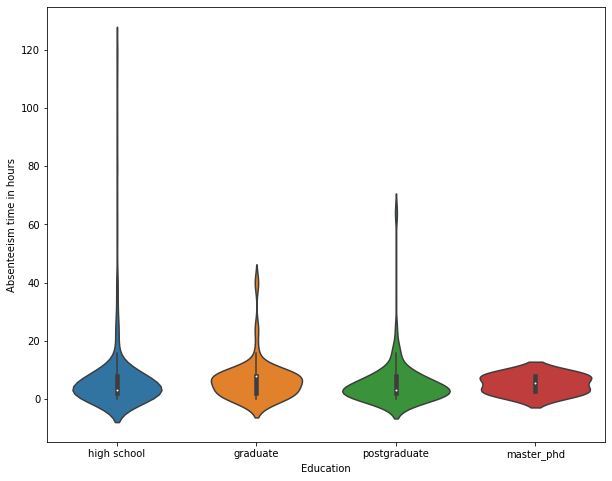

In [33]:
#plot distribution of absence of hours based on education level
plt.figure(figsize=(10,8))
sns.violinplot(data=preprocessed_data, x="Education", y="Absenteeism time in hours", order=["high school", "graduate", "postgraduate", "master_phd"])
plt.savefig("datasets/saved_images/education_hours.png", format='png')

In [34]:
#compute mean and standard deviation of absence hours
education_type = ["high school", "graduate", "postgraduate", "master_phd"]
for edu_type in education_type:
    mask = preprocessed_data['Education'] == edu_type
    hours = preprocessed_data['Absenteeism time in hours'][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Education type: {edu_type:12s} | Mean: {mean:.03f}, | Stddev: {stddev:.03f}")

Education type: high school  | Mean: 7.190, | Stddev: 14.259
Education type: graduate     | Mean: 6.391, | Stddev: 6.754
Education type: postgraduate | Mean: 5.266, | Stddev: 7.963
Education type: master_phd   | Mean: 5.250, | Stddev: 3.202


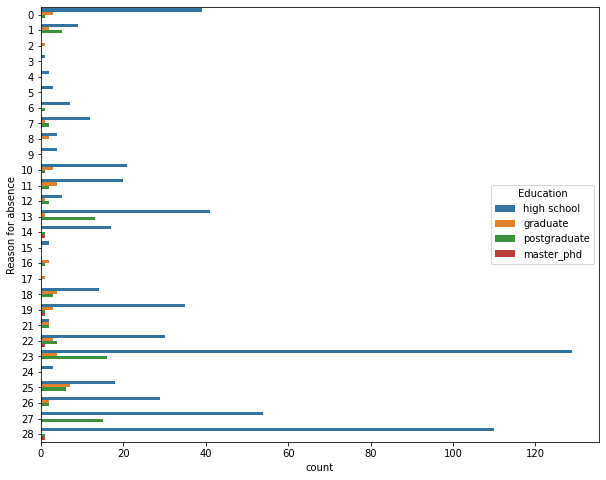

In [36]:
#plot the reason for absence, based on education
plt.figure(figsize=(10,8))
sns.countplot(data=preprocessed_data, hue="Education", hue_order=['high school', 'graduate', 'postgraduate', 'master_phd'], y="Reason for absence")
plt.savefig("datasets/saved_images/education_reason.png", format='png', dpi=300)

In [37]:
"""
define threshold for extreme hours of absenteeism and get total number of entries
"""
threshold = 40
total_entries = len(preprocessed_data)

#find the entries with education
high_school_mask = preprocessed_data['Education'] == "high school"

#fint the entries with absenteeism time in hours more than threshold
extreme_mask = preprocessed_data['Absenteeism time in hours'] > threshold

#probability of having high school degree
prob_high_school = len(preprocessed_data[high_school_mask])/total_entries

#probability of having more then high school degree
prob_graduate = len(preprocessed_data[~high_school_mask])/total_entries

#probability of having high school and being absent for more than threshold hours
prob_extreme_high_school = len(preprocessed_data[high_school_mask & extreme_mask])/total_entries

prob_extreme_graduate = len(preprocessed_data[extreme_mask & ~high_school_mask])/total_entries

#compute and print conditional probabilities
cond_prob_extreme_high_school = prob_extreme_high_school/prob_high_school
cond_prob_extreme_graduate = prob_extreme_graduate/prob_graduate

print(f"P(extreme absence | degree = high school) = {100*cond_prob_extreme_high_school:3.2f}")
print(f"P(extreme absence | degree = !high_school) = {100*cond_prob_extreme_graduate:3.2f}")
preprocessed_data.head().T

P(extreme absence | degree = high school) = 2.29
P(extreme absence | degree = !high_school) = 0.78


,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


So, form the preceding computations, we can see that the probability of having absence of more than 40 hours for employees with high school education is 2.29 which is approximately three time greater than the same porbability for employees with a university degree.

<Figure size 720x576 with 0 Axes>

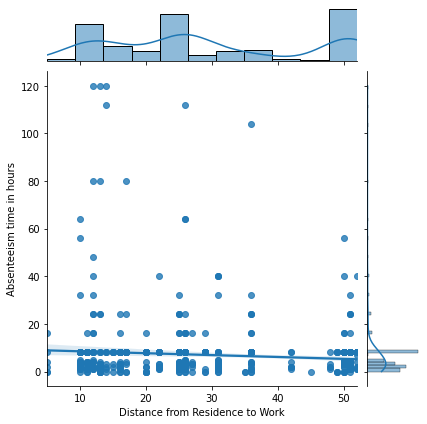

<Figure size 720x576 with 0 Axes>

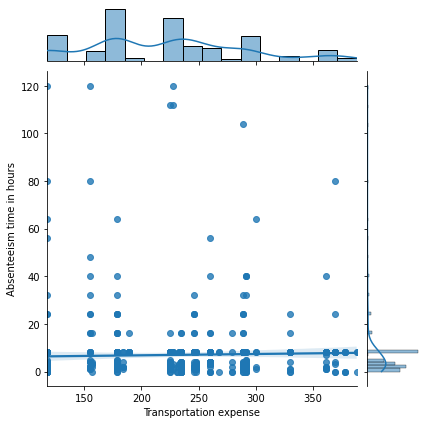

In [38]:
#Transportation costs and distance to work factors
#plot transport ation costs and distance to work against hours

plt.figure(figsize=(10, 8))
sns.jointplot(data=preprocessed_data, x="Distance from Residence to Work", y="Absenteeism time in hours", kind='reg')
plt.savefig("datasets/saved_images/distance_vs_hours.png", format='png')

plt.figure(figsize=(10, 8))
sns.jointplot(data=preprocessed_data, x="Transportation expense", y="Absenteeism time in hours", kind='reg')
plt.savefig("datasets/saved_images/costs_vs_hours.png", format='png')

<Figure size 720x576 with 0 Axes>

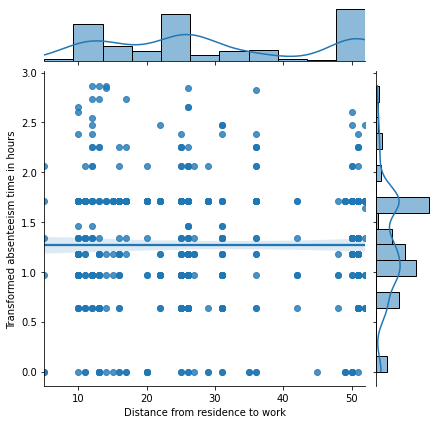

<Figure size 720x576 with 0 Axes>

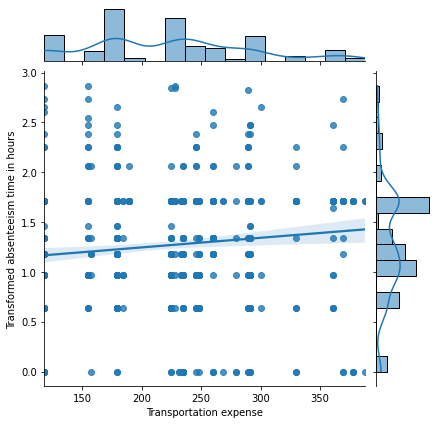

In [40]:
#run Yeo-Johnson transformation and recreate previous plots
from scipy.stats import yeojohnson

hours = yeojohnson(preprocessed_data['Absenteeism time in hours'].apply(float))
distances = preprocessed_data['Distance from Residence to Work']
expenses = preprocessed_data['Transportation expense']

plt.figure(figsize=(10, 8))
ax = sns.jointplot(x=distances, y=hours[0], kind='reg')
ax.set_axis_labels("Distance from residence to work", "Transformed absenteeism time in hours")
plt.savefig("datasets/saved_images/distance_vs_hours_transformed.png", format='png')

plt.figure(figsize=(10,8))
ax = sns.jointplot(x=expenses, y=hours[0], kind='reg')
ax.set_axis_labels("Transportation expense", "Transformed absenteeism time in hours")
plt.savefig("datasets/saved_images/costs_vs_hours_transformed.png", format='png')


<Figure size 720x576 with 0 Axes>

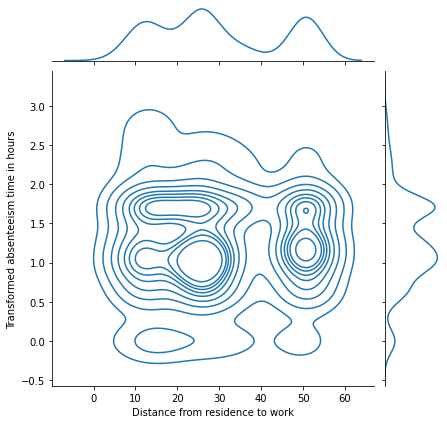

<Figure size 720x576 with 0 Axes>

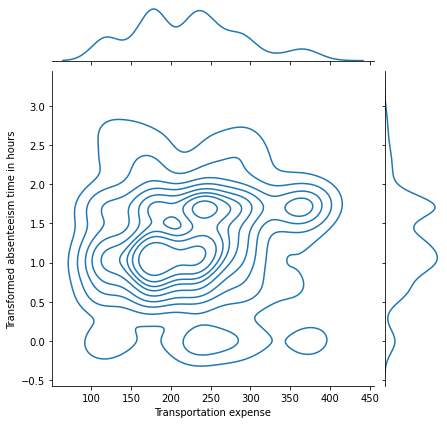

In [41]:
#produce kde(kernel density estimation) plots

plt.figure(figsize=(10, 8))
ax = sns.jointplot(x=distances, y=hours[0], kind='kde')
ax.set_axis_labels("Distance from residence to work", "Transformed absenteeism time in hours")
plt.savefig("datasets/saved_images/distance_vs_hours_transformed.png", format='png')

plt.figure(figsize=(10,8))
ax = sns.jointplot(x=expenses, y=hours[0], kind='kde')
ax.set_axis_labels("Transportation expense", "Transformed absenteeism time in hours")
plt.savefig("datasets/saved_images/costs_vs_hours_transformed.png", format='png')


In [42]:
#investigat correlation between the columns
distance_corr = pearsonr(hours[0], distances)
expenses_corr = pearsonr(hours[0], expenses)
print(f"Distance correlation: corr={distance_corr[0]:.3f}, p-value={distance_corr[1]:.3f}")
print(f"Expenses comparison: corr={expenses_corr[0]:.3f}, p-value={expenses_corr[1]:.3f}")

Distance correlation: corr=-0.000, p-value=0.999
Expenses comparison: corr=0.113, p-value=0.002


Finally from these results, there is a slight positive correlation between Transportation expense and Absenteeism time in hours

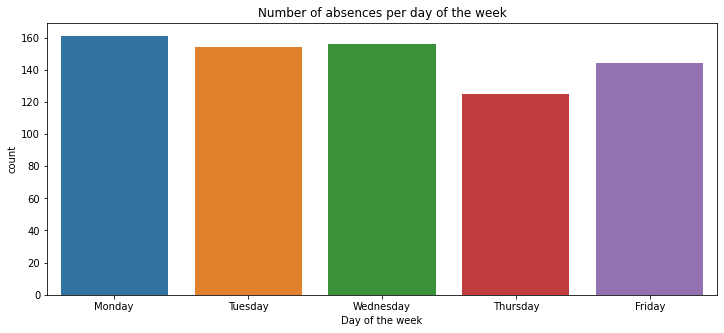

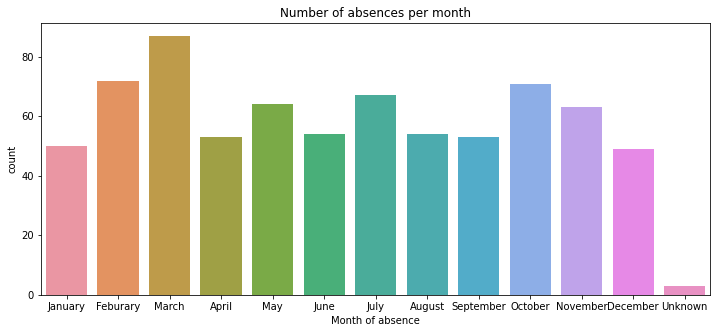

In [43]:
#Temporal factors
#count entries per day of the week and month
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, x="Day of the week", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
ax.set_title("Number of absences per day of the week")
plt.savefig('datasets/saved_images/dow_counts.png', format='png', dpi=300)

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, x="Month of absence", order=["January", "Feburary", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "Unknown"])
ax.set_title("Number of absences per month")
plt.savefig("datasets/saved_images/month_counts.png", format='png', dpi=300)

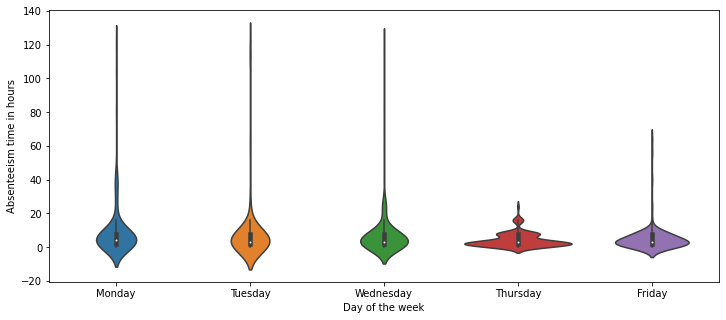

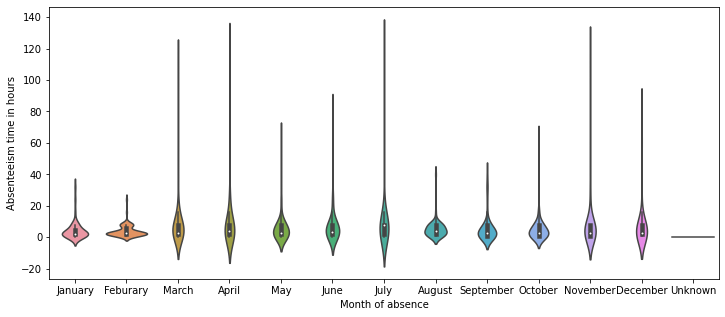

In [44]:
#Investigating absence hours, based on the day of the week and the month of the year
#analyze average distribution of absence hours

plt.figure(figsize=(12, 5))
sns.violinplot(data=preprocessed_data, x="Day of the week", y="Absenteeism time in hours", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
plt.savefig('datasets/saved_images/dow_hours.png', format='png', dpi=300)

plt.figure(figsize=(12, 5))
ax = sns.violinplot(data=preprocessed_data, x="Month of absence", y="Absenteeism time in hours", order=["January", "Feburary", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "Unknown"])
plt.savefig("datasets/saved_images/month_hours.png", format='png', dpi=300)

In [45]:
"""
compute mean and standard deviation of absence hours per day of the week
"""
dows = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

for dow in dows:
    mask = preprocessed_data["Day of the week"] == dow
    hours = preprocessed_data['Absenteeism time in hours'][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Day of the week: {dow:.10s}, | Mean: {mean:.03f} | Stddev: {stddev:.03f}")

Day of the week: Monday, | Mean: 9.248 | Stddev: 15.973
Day of the week: Tuesday, | Mean: 7.981 | Stddev: 18.027
Day of the week: Wednesday, | Mean: 7.147 | Stddev: 13.268
Day of the week: Thursday, | Mean: 4.424 | Stddev: 4.266
Day of the week: Friday, | Mean: 5.125 | Stddev: 7.911


In [47]:
"""
compute mean and standard deviation of absence of hours per day of the month
"""

months = ["January", "Feburary", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

for mon in months:
    mask = preprocessed_data['Month of absence'] == mon
    hours = preprocessed_data['Absenteeism time in hours'][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Month: {mon:10s} | Mean: {mean:8.03f} | Stddev: {stddev:8.03f}")

Month: January    | Mean:    4.440 | Stddev:    5.786
Month: Feburary   | Mean:    4.083 | Stddev:    3.710
Month: March      | Mean:    8.793 | Stddev:   16.893
Month: April      | Mean:    9.094 | Stddev:   18.024
Month: May        | Mean:    6.250 | Stddev:   10.314
Month: June       | Mean:    7.611 | Stddev:   12.359
Month: July       | Mean:   10.955 | Stddev:   21.547
Month: August     | Mean:    5.333 | Stddev:    5.749
Month: September  | Mean:    5.509 | Stddev:    8.407
Month: October    | Mean:    4.915 | Stddev:    8.055
Month: November   | Mean:    7.508 | Stddev:   16.121
Month: December   | Mean:    8.449 | Stddev:   16.049


In [49]:
#perform statistical test for avg duration difference
thursday_mask = preprocessed_data["Day of the week"] == "Thursday"
july_mask = preprocessed_data["Month of absence"] == "July"

thursday_data = preprocessed_data['Absenteeism time in hours'][thursday_mask]
july_data = preprocessed_data['Absenteeism time in hours'][july_mask]

no_thursday_data = preprocessed_data['Absenteeism time in hours'][~thursday_mask]
no_july_data = preprocessed_data['Absenteeism time in hours'][~july_mask]

thursday_res = ttest_ind(thursday_data, no_thursday_data)
july_res = ttest_ind(july_data, no_july_data)

print(f"Thursday test result: Statistic={thursday_res[0]:.3f}, p-value={thursday_res[1]:.3f}")
print(f"July test result: statistic={july_res[0]:.3f}, p-value={july_res[1]:.3f}")


Thursday test result: Statistic=-2.307, p-value=0.021
July test result: statistic=2.605, p-value=0.009


Finally, Since the p-values from both the statistical tests are below the critical value of 0.05, we can conclude the following: 
• There is a statistically significant difference between Thursdays and other days of the week. Absences on Thursday have a shorter duration, on average. 
• Absences during July are the longest over the year. Also, in this case, we can reject the null hypothesis of having no difference. 

                                           0            1            2  \
ID                                        11           36            3   
Reason for absence                        26            0           23   
Month of absence                        July         July         July   
Day of the week                      Tuesday      Tuesday    Wednesday   
Seasons                               Spring       Spring       Spring   
Transportation expense                   289          118          179   
Distance from Residence to Work           36           13           51   
Service time                              13           18           18   
Age                                       33           50           38   
Work load Average/day                239.554      239.554      239.554   
Hit target                                97           97           97   
Disciplinary failure                      No          Yes           No   
Education                        high 

<AxesSubplot:>

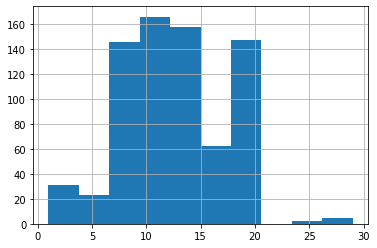

In [51]:
#For further activities
print(preprocessed_data.head().T)
preprocessed_data["Service time"].hist()